**DATA CLEANING USING NETFLIX DATASET**

BY : PRABU KL

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [18]:
data = pd.read_csv('/content/netflix_titles.csv')
data.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB


In [ ]:
data.shape

(8807, 12)

In [19]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [ ]:
data.isnull().sum()

,0
show_id,0
type,0
title,0
director,2634
cast,825
country,831
date_added,10
release_year,0
rating,4
duration,3


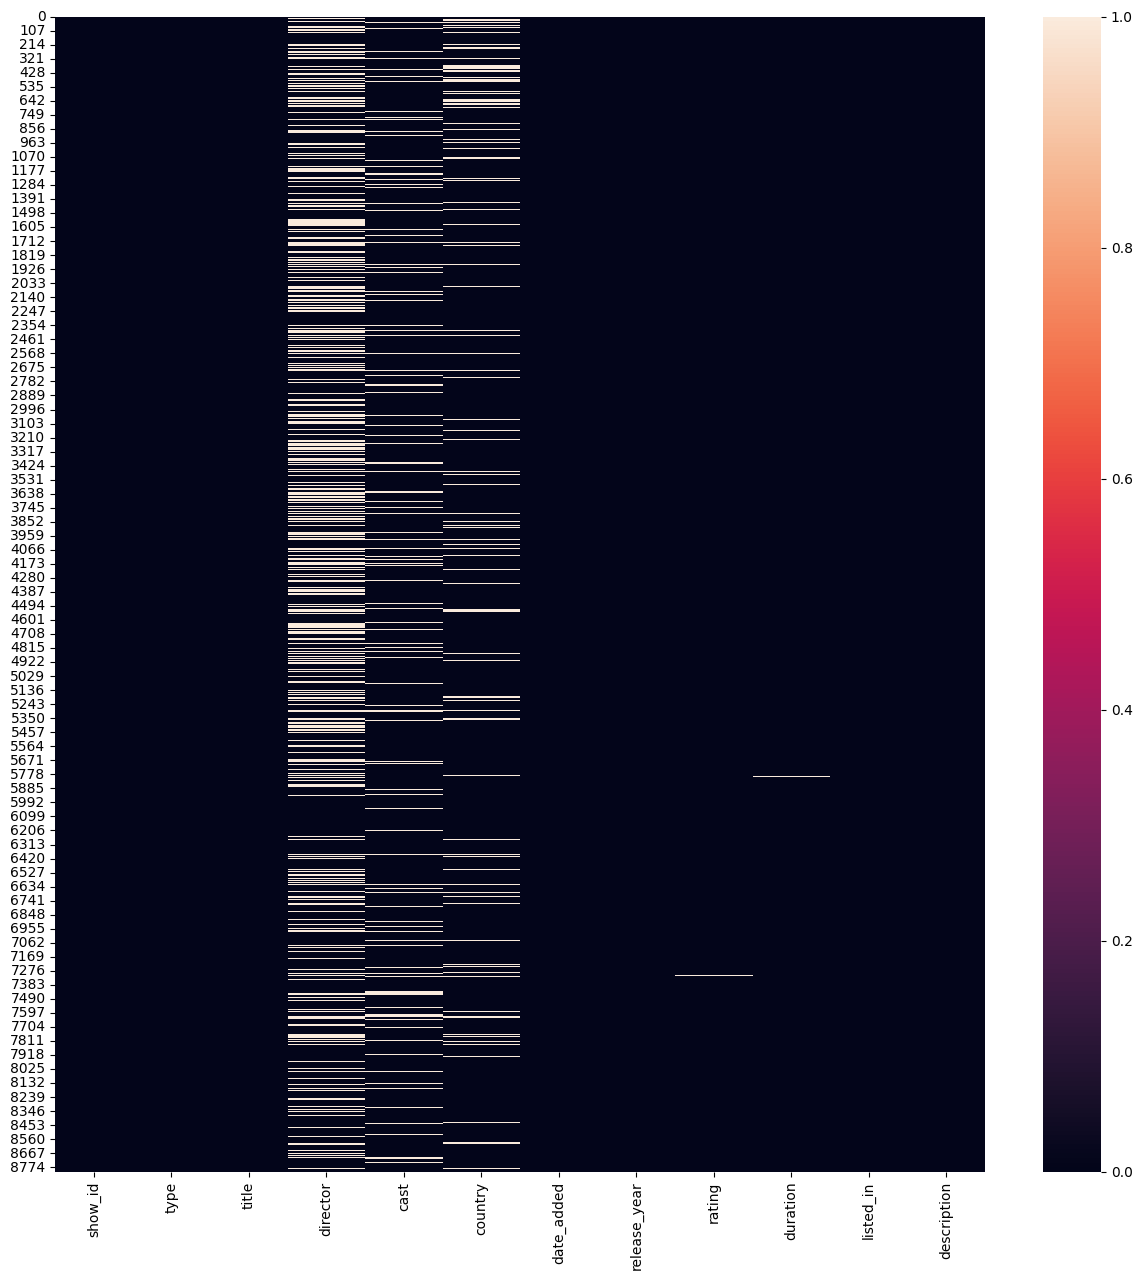

In [20]:
plt.figure(figsize=(15,15))
sns.heatmap(data.isnull())
plt.show()

In [23]:
df = data.drop_duplicates()
df['type'] = df['type'].str.strip().str.title()
df['country'] = df['country'].str.strip().str.title()

In [27]:
df['date_added'] = pd.to_datetime(df['date_added'], errors='coerce')

# Step 7: Rename columns to lowercase with underscores
df.columns = [col.strip().lower().replace(' ', '_') for col in df.columns]

# Step 8: Ensure correct data types
df['release_year'] = pd.to_numeric(df['release_year'], errors='coerce')

# Step 9: Fill missing values with placeholders
df['director'].fillna('Unknown', inplace=True)
df['cast'].fillna('Not Available', inplace=True)
df['country'].fillna('Unknown', inplace=True)
df['date_added'].fillna(pd.Timestamp('1900-01-01'), inplace=True)
df['rating'].fillna('Unrated', inplace=True)
df['duration'].fillna('Unknown', inplace=True)

# Step 10: Process 'duration' column
df[['duration_int', 'duration_type']] = df['duration'].str.extract(r'(\d+)\s*(\w+)', expand=True)
df['duration_int'] = pd.to_numeric(df['duration_int'], errors='coerce')

# Step 11: Save cleaned data to a new CSV
cleaned_filename = 'netflix_titles_cleaned.csv'
df.to_csv(cleaned_filename, index=False)

from google.colab import files
files.download(cleaned_filename)


<ipython-input-27-ad426203edc0>:10: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['director'].fillna('Unknown', inplace=True)
<ipython-input-27-ad426203edc0>:11: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try usin

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>